<a href="https://colab.research.google.com/github/Apyarn95/timeSeriesForecasting/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#loading dataset from drive
data = pd.read_csv('/content/gdrive/My Drive/Electric_Production.csv')


In [ ]:
# calculate the first difference in the data 
data['1stdiff'] = data['Value'].diff()
data['1stdiff'][0] = 0
print(data.head())

         DATE    Value  1stdiff
0  01-01-1985  72.5052   0.0000
1  02-01-1985  70.6720  -1.8332
2  03-01-1985  62.4502  -8.2218
3  04-01-1985  57.4714  -4.9788
4  05-01-1985  55.3151  -2.1563


<ipython-input-62-139d6e6ba711>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['1stdiff'][0] = 0


<AxesSubplot:>

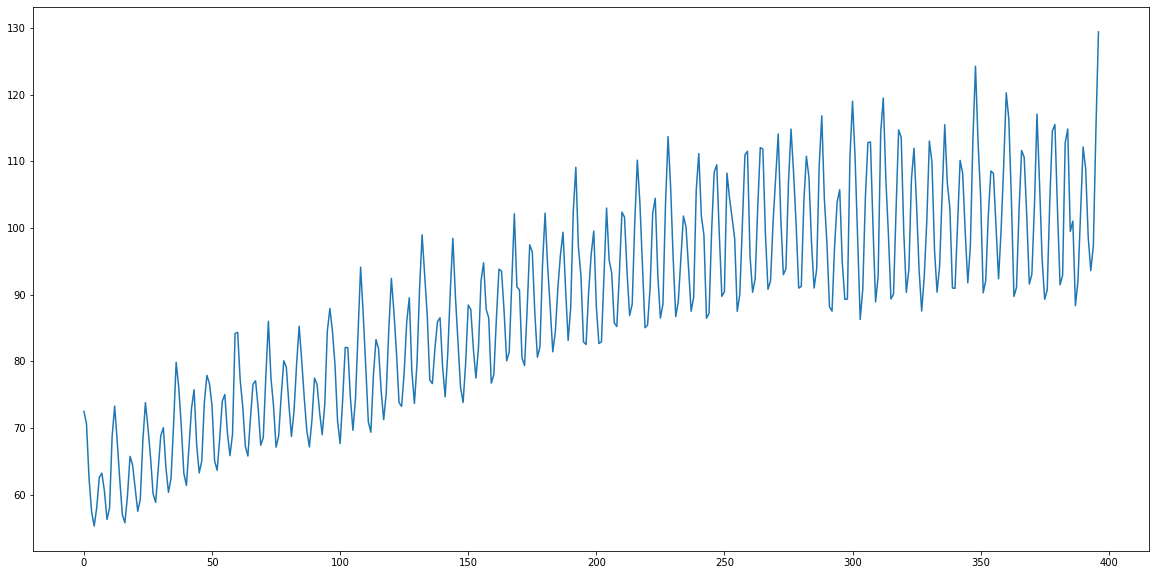

In [ ]:
data['Value'].plot(figsize=(20,10))

<AxesSubplot:>

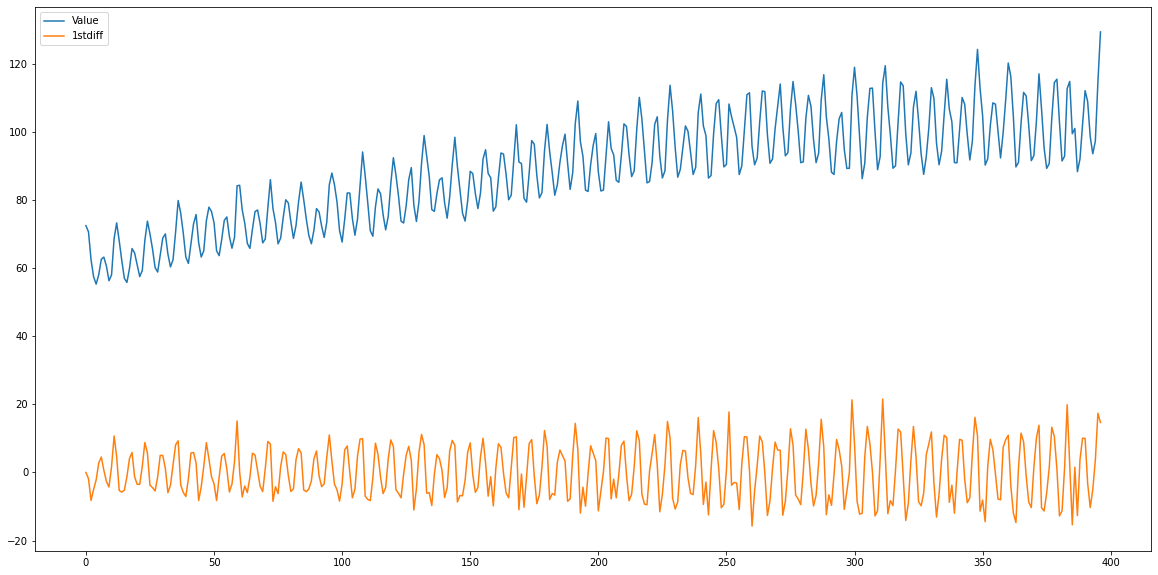

In [ ]:
data.plot(figsize=(20,10))

<AxesSubplot:>

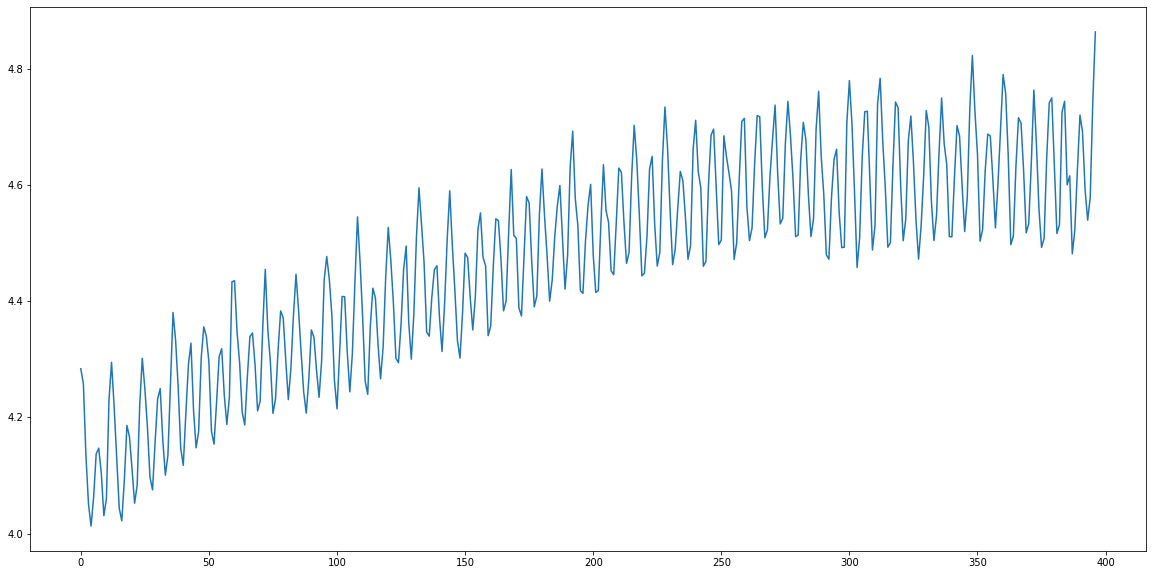

In [ ]:
# we call the log passenger column 
data['LogValue'] = np.log(data['Value'])
data['LogValue'].plot(figsize=(20,10))
# From the below graph we can see that the difference between subsequent crest and trough decreases when compared to original value 
# the seasonality remains constant 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA 

In [ ]:
N_test = 50
train  = data.iloc[:-N_test]
test = data.iloc[-N_test:]

In [ ]:
train_idx = data.index <= train.index[-1]
test_idx = data.index > train.index[-1]

In [ ]:
arima = ARIMA(train['Value'], order=(1,0,0))

In [ ]:
arima_result = arima.fit()

In [ ]:
train['AR(1)'] = arima_result.predict(start=train.index[0], end=train.index[-1])

<ipython-input-72-08ada2904d2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['AR(1)'] = arima_result.predict(start=train.index[0], end=train.index[-1])


<AxesSubplot:>

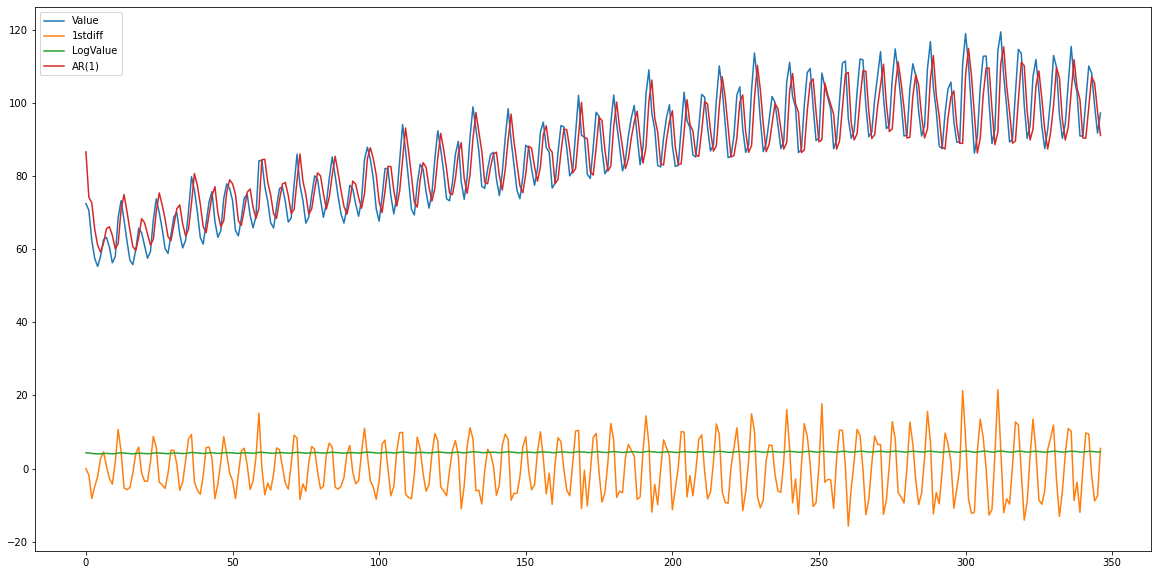

In [ ]:
train.plot(figsize=(20,10))

In [ ]:
# For the forecasted values we use the get_forecast function which returns a prediction_result object
# we then use the predict_mean function to get the actual values 
prediction_result = arima_result.get_forecast(N_test)
forecast = prediction_result.predicted_mean 
test['AR(1)'] = forecast
print(test.head())

           DATE     Value  1stdiff  LogValue      AR(1)
347  12-01-2013  113.4732  16.1879  4.731567  95.955666
348  01-01-2014  124.2549  10.7817  4.822335  94.792218
349  02-01-2014  112.8811 -11.3738  4.726335  93.774183
350  03-01-2014  104.7631  -8.1180  4.651702  92.883389
351  04-01-2014   90.2867 -14.4764  4.502990  92.103930


<ipython-input-74-05d17a835f18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['AR(1)'] = forecast


AxesSubplot(0.125,0.125;0.775x0.755)


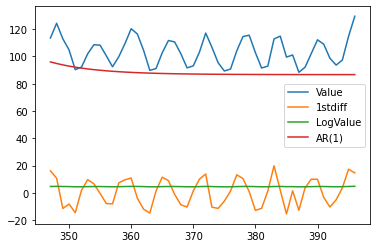

In [ ]:
print(test.plot())

In [ ]:
prediction_result.conf_int()

,lower Value,upper Value
347,81.936089,109.975244
348,76.163315,113.421120
349,72.274025,115.274341
350,69.421172,116.345605
351,67.243914,116.963946
352,65.542633,117.301152
353,64.191809,117.458391
354,63.106409,117.499387
355,62.226024,117.465903
356,61.506322,117.385956


In [ ]:
train.head()

,DATE,Value,1stdiff,LogPassenger,AR(1)
0,01-01-1985,72.5052,0.0000,4.283658,86.646999
1,02-01-1985,70.6720,-1.8332,4.258049,74.272720
2,03-01-1985,62.4502,-8.2218,4.134369,72.668644
3,04-01-1985,57.4714,-4.9788,4.051287,65.474450
4,05-01-1985,55.3151,-2.1563,4.013046,61.117927


In [ ]:
# Define a function to draw the fitted values of thr ARIMA along with the forecast and confidence interval 
def plot_fit_and_forecast(result):
  fig , ax = plt.subplots(figsize=(20,10))
  ax.plot(data['Value'], label='data')

  # For the training set 
  train_pred = result.fittedvalues
  ax.plot(train.index, train_pred, color='green', label='fitted')

  # Forecast the test set
  prediction_result = result.get_forecast(N_test)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int['lower Value'] , conf_int['upper Value']
  forecast = prediction_result.predicted_mean 
  ax.plot(test.index, forecast, label='forecast')

  ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)
  ax.legend()

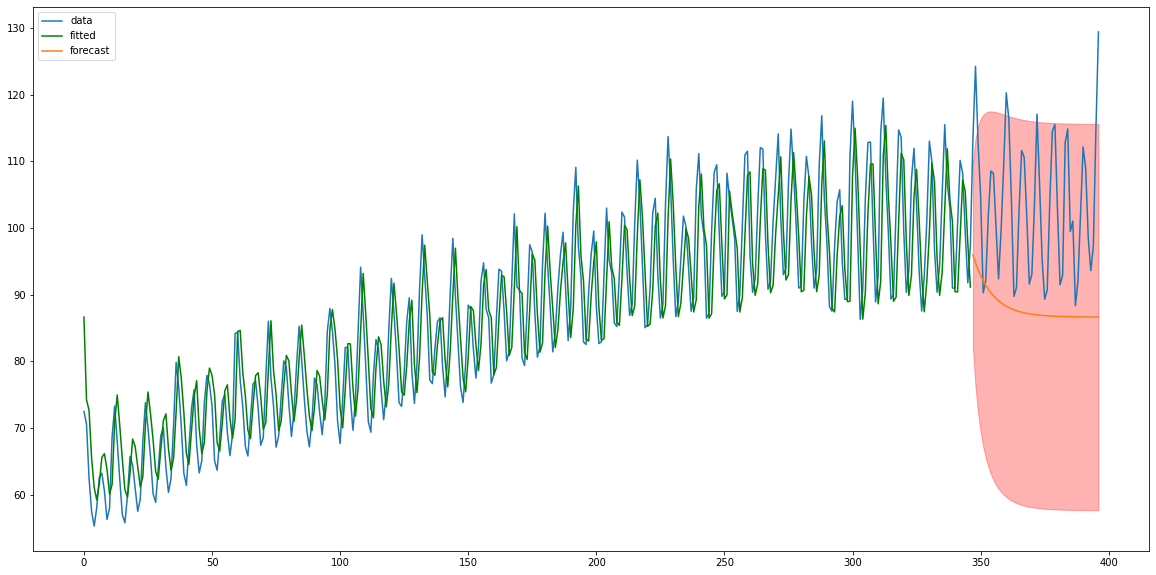

In [ ]:
plot_fit_and_forecast(arima_result)

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


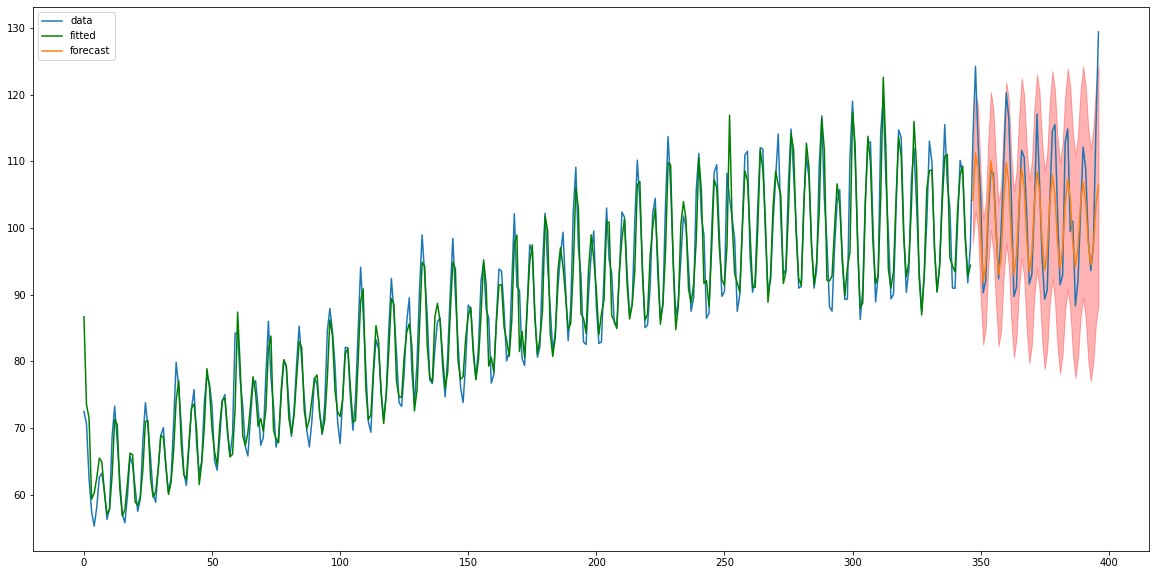

In [ ]:
# Now we would implement an AP(10) model which is also defined as ARIMA(10,0,0)
arima_10 = ARIMA(train['Value'], order=(10,0,0))
arima_10_result = arima_10.fit()
plot_fit_and_forecast(arima_10_result)
## we can see the AR model seems much more relevant to the actual predictions than the 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


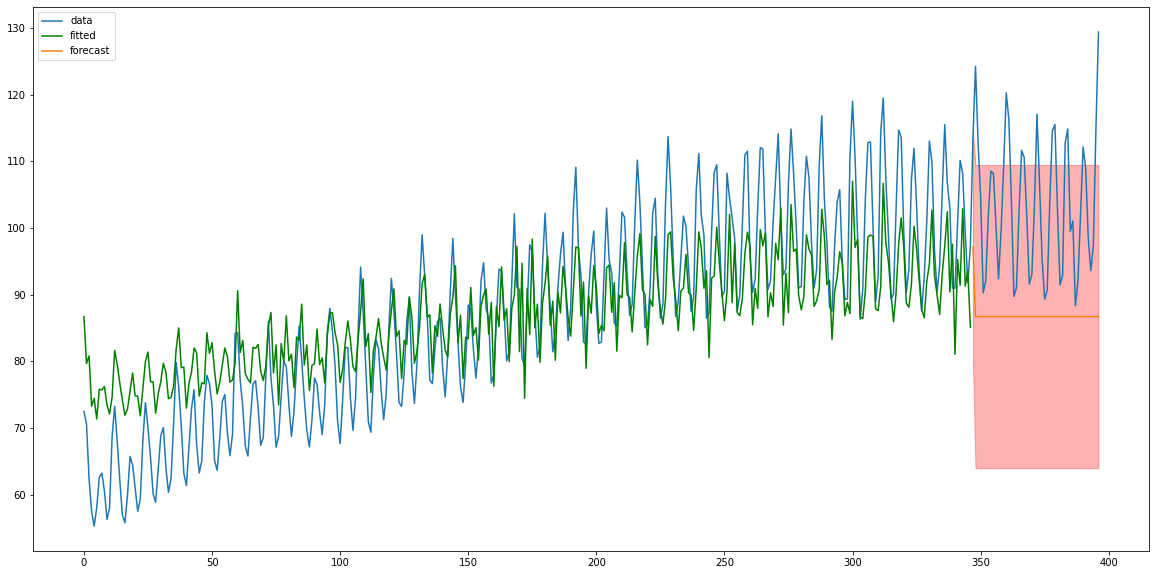

In [ ]:
# MA-1 model - Now we would define the MA-1 model 
# which is equivalent to ARIMA(0,0,1)
arima_ma_1 = ARIMA(train['Value'],order=(0,0,1))
arima_ma_1_result = arima_ma_1.fit()
plot_fit_and_forecast(arima_ma_1_result)

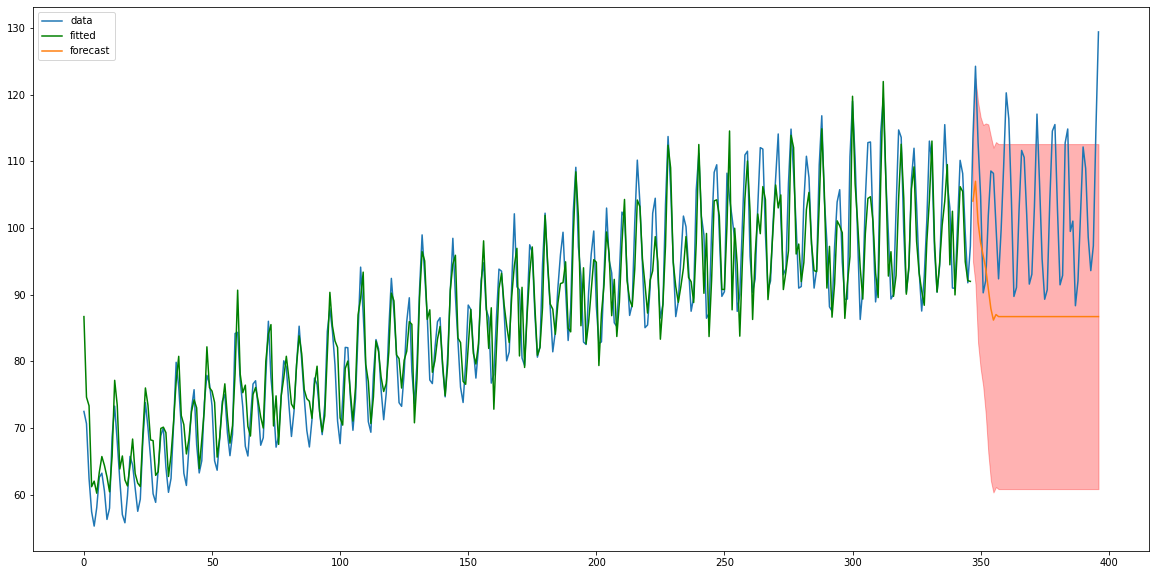

In [ ]:
# MA-10 model - Now we would define the MA-10 model 
# which is equivalent to ARIMA(0,0,10)
arima_ma_10 = ARIMA(train['Value'],order=(0,0,10))
arima_ma_10_result = arima_ma_10.fit()
plot_fit_and_forecast(arima_ma_10_result)

<ipython-input-85-8bd090542c40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['LogValueDiff'] = train['LogValue'].diff()


<AxesSubplot:>

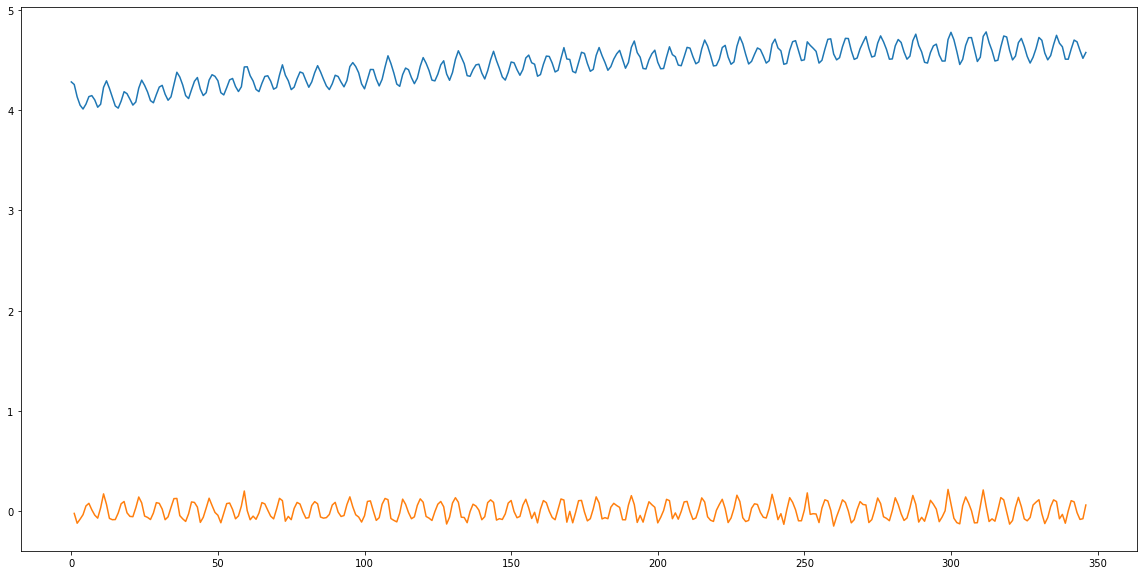

In [ ]:
# train.head()
train['LogValue'].plot()
train['LogValueDiff'] = train['LogValue'].diff()
train['LogValueDiff'].plot(figsize=(20,10))

# we can observe in the following graph, unlike the difference of the values 
# difference between the log terms seems stationary without any increasing trend


In [ ]:
arima_811 = ARIMA(train['Value'], order=(8,1,1))
arima_result_811 = arima_811.fit()

def plot_fit_and_forecast_int(result, d, col='Value'):
  # d -> first row in the differenced time series that actually exist
  fig, ax = plt.subplots(figsize=(30,20))
  ax.plot(data[col], label='data')

  # Plot the curve on train set 
  train_pred = result.predict(start = train.index[d], end= train.index[-1])
  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  # forecast the test set 
  prediction_result = result.get_forecast(N_test)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)

  ax.legend()


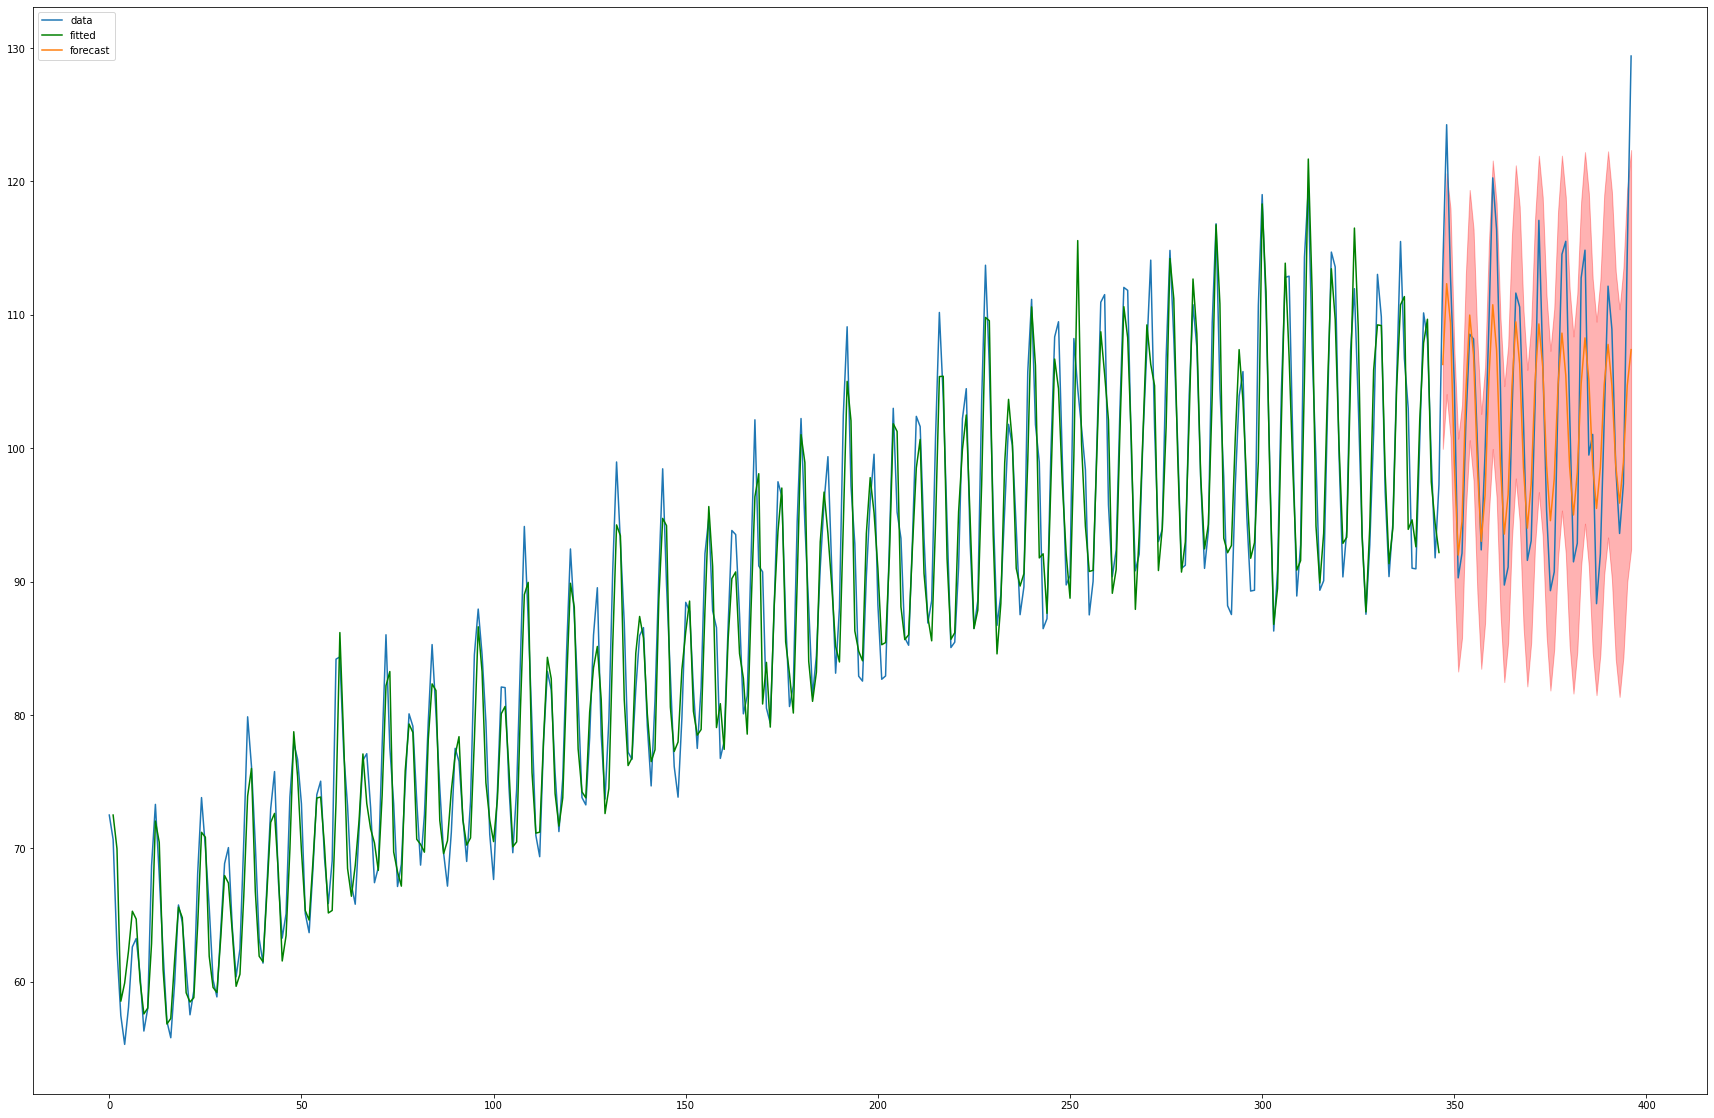

In [ ]:
plot_fit_and_forecast_int(arima_result_811,1)

In [ ]:
train.head()

,DATE,Value,1stdiff,LogValue,AR(1),LogValueDiff
0,01-01-1985,72.5052,0.0000,4.283658,86.646999,NaN
1,02-01-1985,70.6720,-1.8332,4.258049,74.272720,-0.025609
2,03-01-1985,62.4502,-8.2218,4.134369,72.668644,-0.123680
3,04-01-1985,57.4714,-4.9788,4.051287,65.474450,-0.083082
4,05-01-1985,55.3151,-2.1563,4.013046,61.117927,-0.038242


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


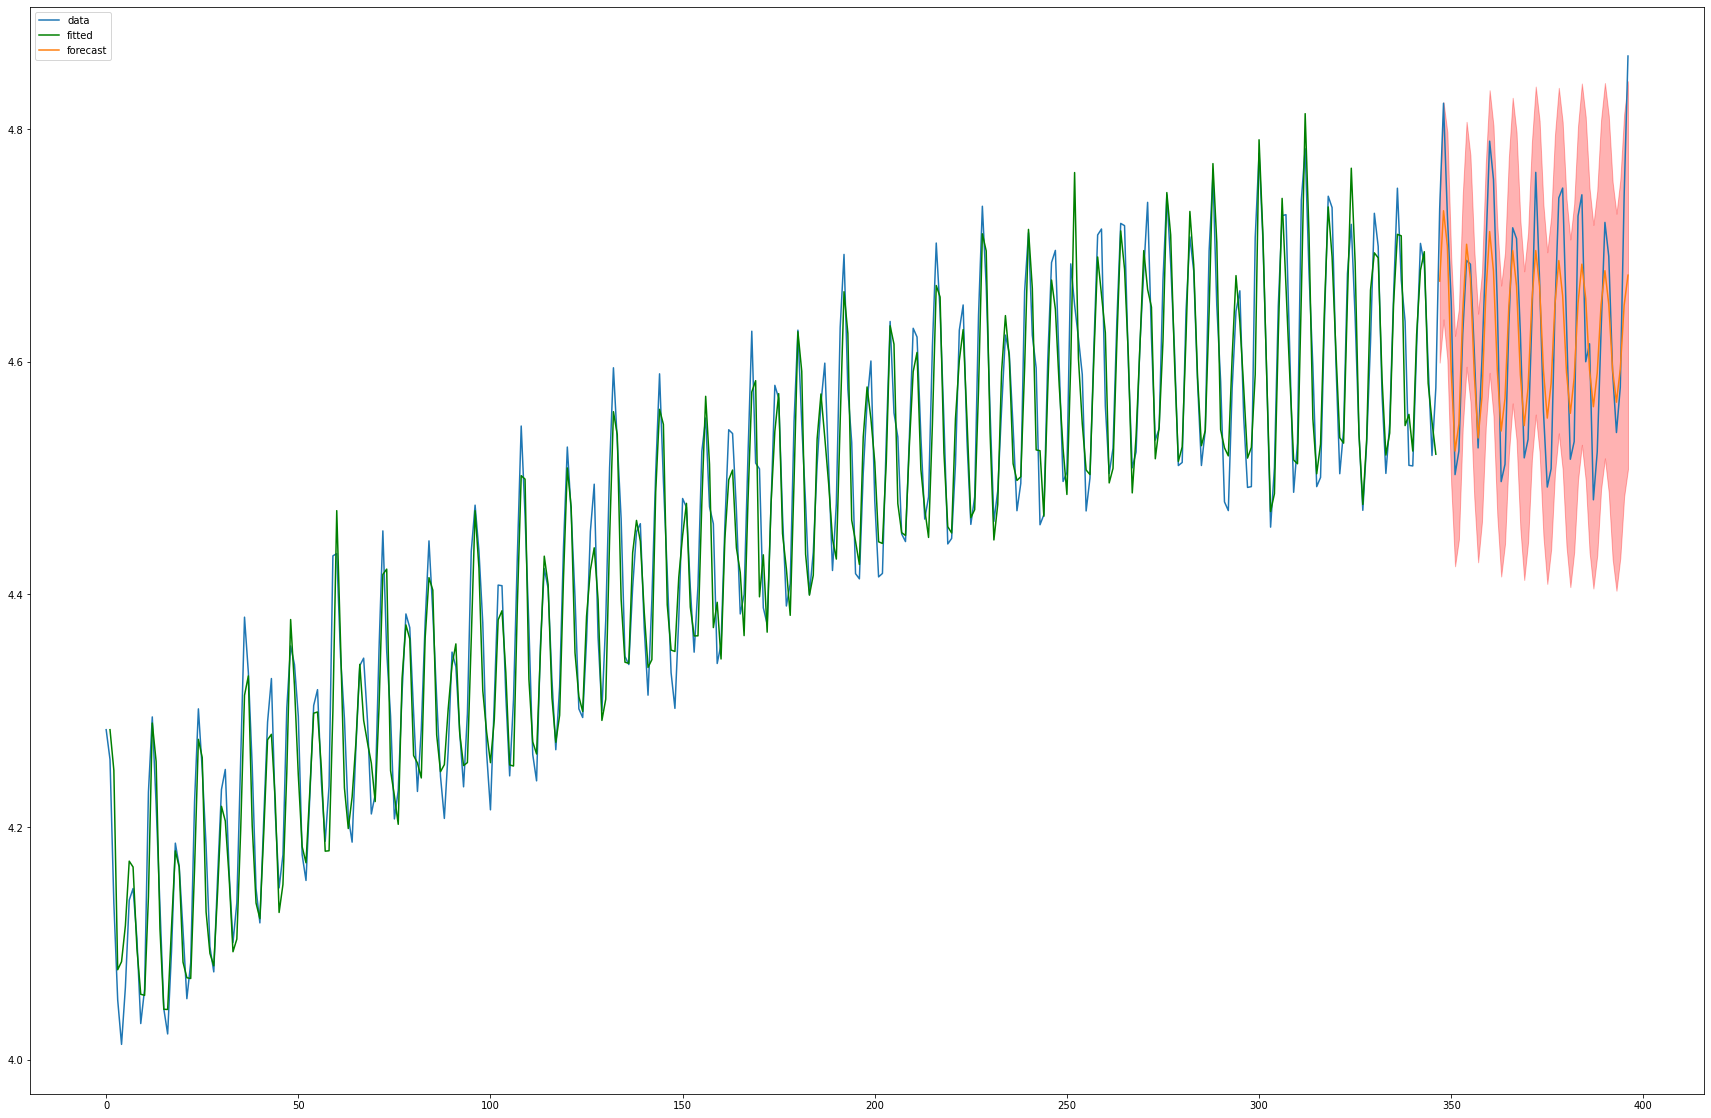

In [ ]:
# Now we would use the ARIMA model with the logged dataset 
arima_log_811 = ARIMA(train['LogValue'], order=(8,1,1))
arima_result_log_811 = arima_log_811.fit()
plot_fit_and_forecast_int(arima_result_log_811,1, col='LogValue')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


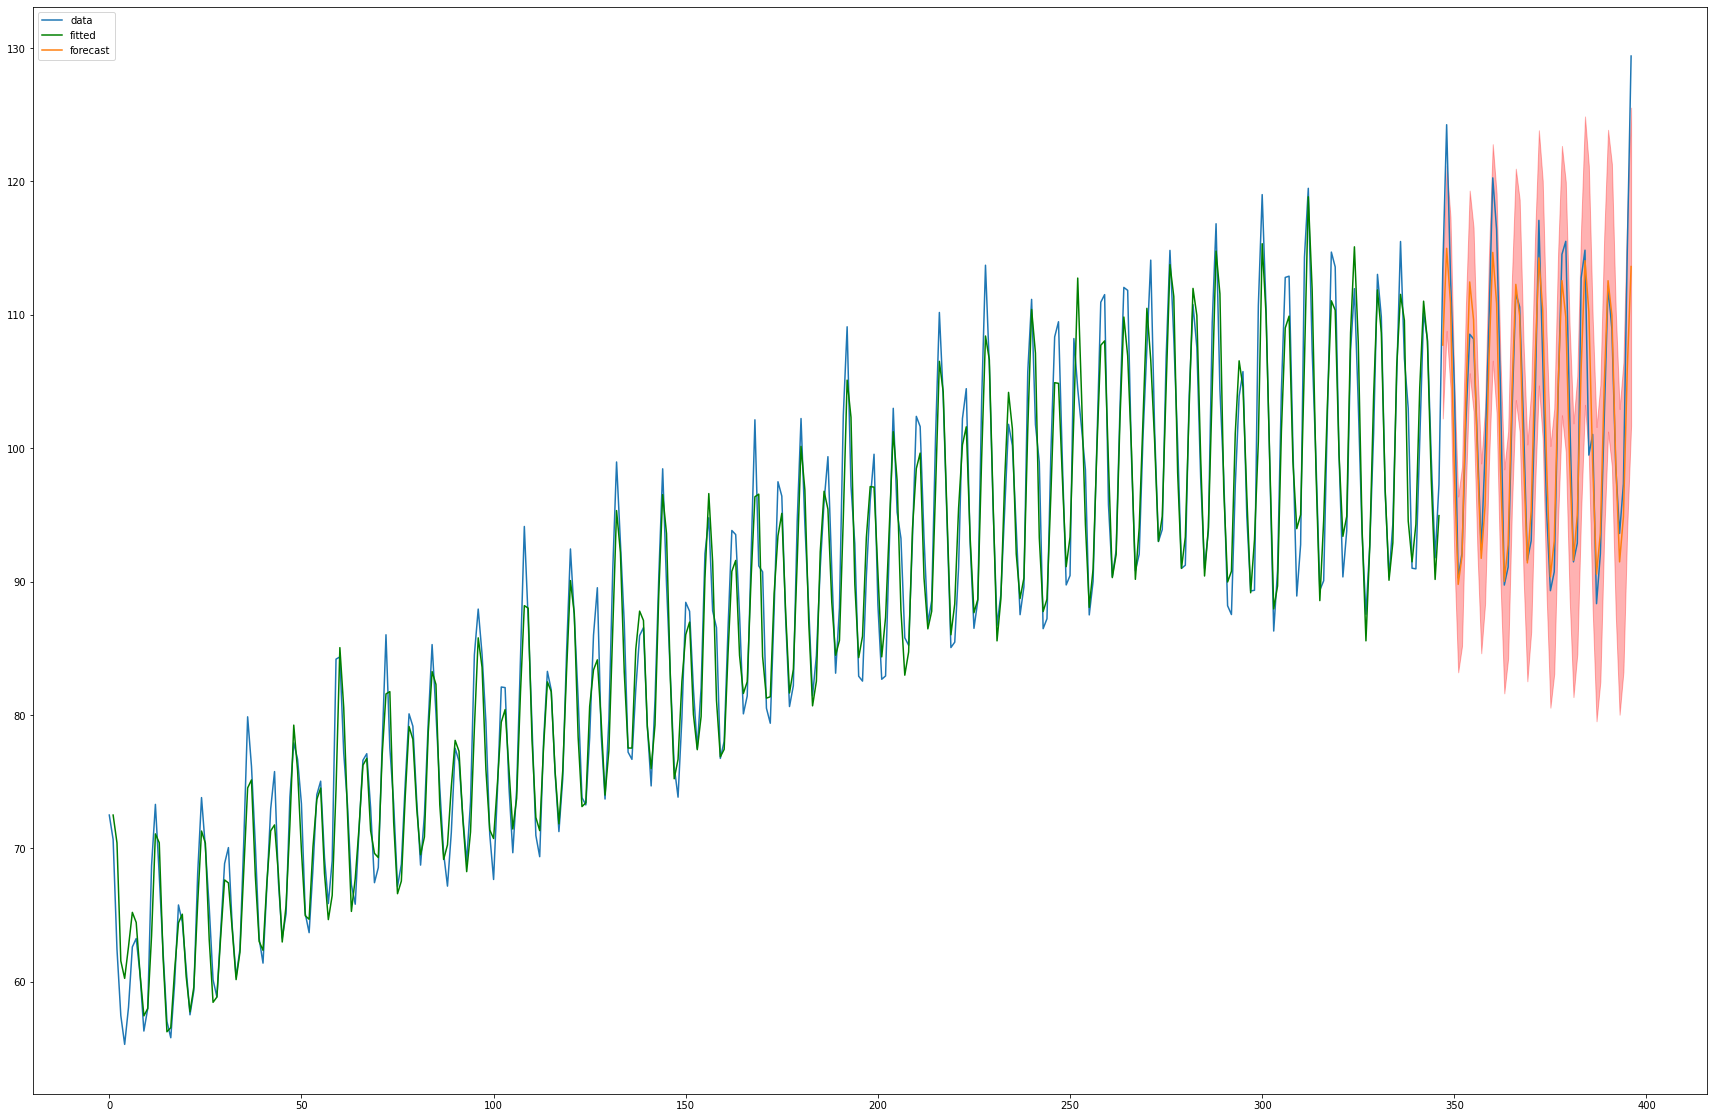

In [ ]:
# taking larger values for both the AR and MA sequences 
arima_10110 = ARIMA(train['Value'], order=(10,1,10))
arima_result_10110 = arima_10110.fit()
plot_fit_and_forecast_int(arima_result_10110,1, col='Value')